In this example we will investigate how simple Linear Model outperforms LSTM neural network for physical system learning. The simple pendulum generates time-series data:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from cntk import load_model

import physical_models as phys
import models

from main_pendulum import plot

In [3]:
T = 16 # time interval
dt = 0.1 # integration step
# train data (oscillation with initial angle = pi/6):
t, train = phys.simulate_pendulum(0, np.array([np.pi/6, 0]), T, dt=dt)
# test data (oscillation with initial angle = pi/4):
_, test1 = phys.simulate_pendulum(0, np.array([np.pi/4, 0]), T, dt=dt)
# test data (fixed point with angle = 0):
_, test2 = phys.simulate_pendulum(0, np.array([0.0, 0.0]), T, dt=dt)

One can train both LSTM, and Linear models:

In [4]:
N = 5 # size of the history window (for LSTM)

# train lstm model
# model_lstm = models.train_lstm(train, N)
# model_lstm.save('bin_models/pendulum_lstm')
# or load pre-built one
model_lstm = load_model('bin_models/pendulum_lstm')


# train linear model
# model_linear = models.train_linear(train, N)
# model_linear.save('bin_models/pendulum_linear')
# or load pre-built one
model_linear = load_model('bin_models/pendulum_linear')

For training only one solution of pendulum oscillation was selected. For testing other initial conditions are investigated.

/usr/local/lib/python3.5/dist-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input3") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
/usr/local/lib/python3.5/dist-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input1001") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


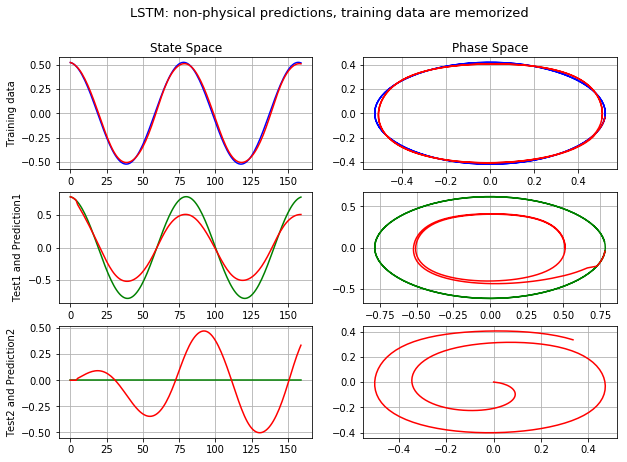

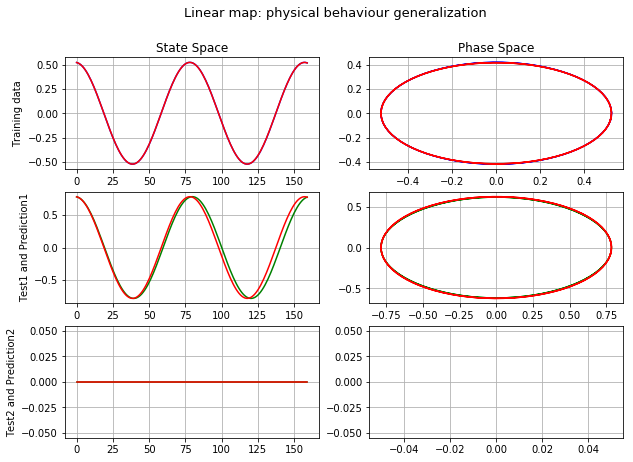

In [7]:
for model, n, title in zip([model_lstm, model_linear],
                           [N, 1],
                           ["LSTM: non-physical predictions, training data are memorized",
                            "Linear map: physical behaviour generalization"]):
    # use model for prediction with training initial angle = pi/6
    pred = models.predict(model, train[:n], step_count=int(T/dt-n), N=n)
    # use model for prediction with initial angle = pi/4
    pred1 = models.predict(model, test1[:n], step_count=int(T/dt-n), N=n)
    # use lstm for prediction with initial angle = 0
    pred2 = models.predict(model, test2[:n], step_count=int(T/dt-n), N=n)

    plot(title, train, test1, test2, pred, pred1, pred2)
    
plt.show()

One can see, that LSTM every time just reproduces training data. While Linear Model recognizes oscillation pattern, as well as predicts fixed point with no oscillation.